# Homework 9: Exploring a Store Sales Database with MongoDB

This is an **individual** assignment. Total: 20 points. Due:**<span style="color:red">  Sunday, November 19, 10:00 pm </span>**.

In this homework you will practice writing MongoDB queries to explore a dataset containing sales transactions. The dataset includes various fields such as invoice numbers, customer demographics, transaction details, and more.

**Dataset**: https://raw.githubusercontent.com/catalinVeghes/DSCI-105-Applied-Data-Analytics/main/datasets/stores_dataset.csv

**Task 1**: Import data from the provided CSV file into a MongoDB database. You need to create a new database called `stores_db` and within that database, a collection named `stores`.

In [48]:
import pandas as pd
import requests
from pymongo import MongoClient
import json

# URL of the CSV data
csv_url = 'https://raw.githubusercontent.com/catalinVeghes/DSCI-105-Applied-Data-Analytics/main/datasets/stores_dataset.csv'

# Read the CSV data into a Pandas DataFrame
df = pd.read_csv(csv_url)

# Convert the DataFrame to a list of dictionaries (JSON-like) for insertion into MongoDB
records = df.to_dict(orient='records') # ‘records’ : list like [{column -> value}, … , {column -> value}]

print(records[:10], '/n')

from pymongo.errors import ConnectionFailure

# Replace 'admin' and 'password' with your MongoDB admin username and password
username = 'admin'
password = 'password'

# Connection URI
# Assuming your MongoDB is running on the default port 27017
uri = f"mongodb://localhost:27017/"

# Connect to MongoDB
try:
    client = MongoClient(uri)
    
    # The .command() method is a flexible way to run MongoDB commands directly. It's particularly useful for administrative commands that aren't covered by more specific PyMongo methods.
    # For example, the 'ismaster' command is a diagnostic command that returns a document with information about the MongoDB server instance. It is often used to check the status and confirm connectivity to the server.
    client.admin.command('ismaster')

    # If the above command did not raise an exception, we're connected!
    print("MongoDB connection successful.")

except ConnectionFailure as e:
    print(f"MongoDB connection failed: {e}")

[{'invoice_no': 'I138884', 'invoice_date': '10/30/2016 9:58', 'customer_id': 'C241288', 'gender': 'Female', 'age': 28, 'category': 'Clothing', 'quantity': 5, 'selling_price_per_unit': 1500.4, 'cost_price_per_unit': 1425.38, 'payment_method': 'Credit Card', 'region': 'South', 'state': 'Kentucky', 'shopping_mall': 'Kanyon'}, {'invoice_no': 'I317333', 'invoice_date': '10/30/2016 9:58', 'customer_id': 'C111565', 'gender': 'Male', 'age': 21, 'category': 'Shoes', 'quantity': 3, 'selling_price_per_unit': 1800.51, 'cost_price_per_unit': 1620.459, 'payment_method': 'Debit Card', 'region': 'South', 'state': 'Kentucky', 'shopping_mall': 'Viaport Outlet'}, {'invoice_no': 'I127801', 'invoice_date': '10/30/2016 9:58', 'customer_id': 'C266599', 'gender': 'Male', 'age': 20, 'category': 'Clothing', 'quantity': 1, 'selling_price_per_unit': 300.08, 'cost_price_per_unit': 295.06, 'payment_method': 'Cash', 'region': 'West', 'state': 'California', 'shopping_mall': 'Metrocity'}, {'invoice_no': 'I173702', 'in

In [49]:
# Replace with your remote MongoDB credentials and host information
username = 'student'
password = 'student_password'
port = '27017'  # Default MongoDB port; change it if your MongoDB is running on a different port

# Create the MongoDB URI
MONGO_DB_URI = f"mongodb://localhost:27017/"

# Constants
DB_NAME = 'stores_db'
COLLECTION_NAME = 'stores'

# Initialize MongoDB Client
client = MongoClient(MONGO_DB_URI)
db = client[DB_NAME]
collection = db[COLLECTION_NAME]

if collection.count_documents({}) == 0:
    # Insert the records into the MongoDB collection
    result = collection.insert_many(records)

    # Print confirmation
    print(f'Inserted {len(result.inserted_ids)} records into the database.')
else:
    print(f'{collection.count_documents({})} records found.')

99397 records found.


In [55]:
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park


**Task 2**: Find the total number of documents in the database.

In [22]:
print(f'{collection.count_documents({})} records found.')

99457 records found.


**Task 3**: Find the number of transactions that utilized `Credit Card` as the `payment_method`.

In [17]:
collection.count_documents({'payment_method': 'Credit Card'})

34931

**Task 4**: Find all transactions with a `quantity` of `10` or more.

In [19]:
results = collection.find({'quantity': {'$gte': 10}})
for stores in results:
    print(stores)

{'_id': ObjectId('6554ec04d34996cab1c4db29'), 'invoice_no': 'I207205', 'invoice_date': '10/30/2016 10:12', 'customer_id': 'C716161', 'gender': 'Female', 'age': 33, 'category': 'Clothing', 'quantity': 10, 'selling_price_per_unit': 300.08, 'cost_price_per_unit': 225.06, 'payment_method': 'Debit Card', 'region': 'East', 'state': 'New York', 'shopping_mall': 'Kanyon'}
{'_id': ObjectId('6554ec04d34996cab1c4db50'), 'invoice_no': 'I283443', 'invoice_date': '10/30/2016 10:21', 'customer_id': 'C189493', 'gender': 'Male', 'age': 43, 'category': 'Technology', 'quantity': 15, 'selling_price_per_unit': 3150.0, 'cost_price_per_unit': 2677.5, 'payment_method': 'Credit Card', 'region': 'Central', 'state': 'Illinois', 'shopping_mall': 'Viaport Outlet'}
{'_id': ObjectId('6554ec04d34996cab1c4db59'), 'invoice_no': 'I293215', 'invoice_date': '10/30/2016 10:23', 'customer_id': 'C166635', 'gender': 'Male', 'age': 18, 'category': 'Cosmetics', 'quantity': 12, 'selling_price_per_unit': 162.64, 'cost_price_per_u

**Task 5**: Find all transactions at `Metrocity mall` involving customers aged `18 to 20` who used a `Debit Card` to buy `at least 5 Toys`.

In [37]:
results = collection.find({'shopping_mall': 'Metrocity', 'age': {'$gte': 18, '$lte': 20}, 'payment_method': 'Debit Card', 'quantity': {'$gte': 5}}) 
for stores in results:
    print(stores)

{'_id': ObjectId('6554ec04d34996cab1c4e1fa'), 'invoice_no': 'I311320', 'invoice_date': '10/30/2016 16:59', 'customer_id': 'C289977', 'gender': 'Male', 'age': 18, 'category': 'Toys', 'quantity': 5, 'selling_price_per_unit': 179.2, 'cost_price_per_unit': 143.36, 'payment_method': 'Debit Card', 'region': 'West', 'state': 'Oregon', 'shopping_mall': 'Metrocity'}
{'_id': ObjectId('6554ec04d34996cab1c4e29f'), 'invoice_no': 'I148903', 'invoice_date': '10/30/2016 17:38', 'customer_id': 'C132867', 'gender': 'Female', 'age': 19, 'category': 'Toys', 'quantity': 5, 'selling_price_per_unit': 179.2, 'cost_price_per_unit': 143.36, 'payment_method': 'Debit Card', 'region': 'Central', 'state': 'Illinois', 'shopping_mall': 'Metrocity'}
{'_id': ObjectId('6554ec04d34996cab1c4e3c8'), 'invoice_no': 'I153391', 'invoice_date': '10/30/2016 18:47', 'customer_id': 'C339188', 'gender': 'Female', 'age': 18, 'category': 'Souvenir', 'quantity': 5, 'selling_price_per_unit': 58.65, 'cost_price_per_unit': 43.9875, 'paym

**Task 6**: Find the `total quantity` sold for each category where the `payment_method` is `Cash`.

In [4]:
match_stage = {'$match': {'payment_method': 'Cash'}}
group_stage = {'$group': {'_id': {'category': '$category'}, 'quantity': {'$sum': '$quantity'}}}
results = collection.aggregate([match_stage, group_stage])

for record in results:
    print(record)

{'_id': {'category': 'Toys'}, 'quantity': 13745}
{'_id': {'category': 'Technology'}, 'quantity': 6720}
{'_id': {'category': 'Books'}, 'quantity': 6831}
{'_id': {'category': 'Food & Beverage'}, 'quantity': 19623}
{'_id': {'category': 'Souvenir'}, 'quantity': 6486}
{'_id': {'category': 'Cosmetics'}, 'quantity': 19953}
{'_id': {'category': 'Shoes'}, 'quantity': 13492}
{'_id': {'category': 'Clothing'}, 'quantity': 46559}


**Task 7**: List `last 10` transactions `sorted` by `cost_price_per_unit` in `descending order`.

In [62]:
sort_stage = {'$sort': {'cost_price_per_unit': -1}}
skip_stage = {'$skip': 99457 - 10}
results = collection.aggregate([sort_stage, skip_stage])

for record in results:
    print(record)

{'_id': ObjectId('6554ec04d34996cab1c65e2f'), 'invoice_no': 'I240802', 'invoice_date': '11/15/2016 11:30', 'customer_id': 'C327326', 'gender': 'Male', 'age': 48, 'category': 'Food & Beverage', 'quantity': 1, 'selling_price_per_unit': 5.23, 'cost_price_per_unit': 3.661, 'payment_method': 'Cash', 'region': 'Central', 'state': 'Indiana', 'shopping_mall': 'Istinye Park'}
{'_id': ObjectId('6554ec04d34996cab1c65e5b'), 'invoice_no': 'I160755', 'invoice_date': '11/15/2016 11:40', 'customer_id': 'C216948', 'gender': 'Male', 'age': 67, 'category': 'Food & Beverage', 'quantity': 1, 'selling_price_per_unit': 5.23, 'cost_price_per_unit': 3.661, 'payment_method': 'Cash', 'region': 'South', 'state': 'North Carolina', 'shopping_mall': 'Zorlu Center'}
{'_id': ObjectId('6554ec04d34996cab1c65e62'), 'invoice_no': 'I149977', 'invoice_date': '11/15/2016 11:42', 'customer_id': 'C102584', 'gender': 'Female', 'age': 66, 'category': 'Food & Beverage', 'quantity': 1, 'selling_price_per_unit': 5.23, 'cost_price_p

**Task 8**: Retrieve the second set of `10` transactions when `sorted` by `selling_price_per_unit` in `ascending` order.

In [6]:
sort_stage = {'$sort': {'selling_price_per_unit': 1}}
skip_stage = {'$skip': 10}
limit_stage = {'$limit': 10}
results = collection.aggregate([sort_stage, skip_stage, limit_stage])

for record in results:
    print(record)

{'_id': ObjectId('6554ec04d34996cab1c4dc7a'), 'invoice_no': 'I306136', 'invoice_date': '10/30/2016 11:31', 'customer_id': 'C324783', 'gender': 'Male', 'age': 26, 'category': 'Food & Beverage', 'quantity': 1, 'selling_price_per_unit': 5.23, 'cost_price_per_unit': 3.661, 'payment_method': 'Cash', 'region': 'Central', 'state': 'Texas', 'shopping_mall': 'Metrocity'}
{'_id': ObjectId('6554ec04d34996cab1c4db01'), 'invoice_no': 'I412481', 'invoice_date': '10/30/2016 10:03', 'customer_id': 'C125696', 'gender': 'Female', 'age': 27, 'category': 'Food & Beverage', 'quantity': 1, 'selling_price_per_unit': 5.23, 'cost_price_per_unit': 3.661, 'payment_method': 'Cash', 'region': 'Central', 'state': 'Iowa', 'shopping_mall': 'Istinye Park'}
{'_id': ObjectId('6554ec04d34996cab1c4dc7b'), 'invoice_no': 'I240224', 'invoice_date': '10/30/2016 11:31', 'customer_id': 'C281502', 'gender': 'Male', 'age': 53, 'category': 'Food & Beverage', 'quantity': 1, 'selling_price_per_unit': 5.23, 'cost_price_per_unit': 3.6

**Task 9**: Calculate the `total revenue` (`quantity` multiplied by `selling_price_per_unit`) for each `category`.

In [84]:
group_stage = {'$group': {'_id': '$category', 'total_revenue': {'$sum': {'$multiply': ['$quantity', '$selling_price_per_unit']}}}}

results = collection.aggregate([group_stage])

for record in results:
    print(record)

{'_id': 'Clothing', 'total_revenue': 114014495.76}
{'_id': 'Books', 'total_revenue': 834658.9500000001}
{'_id': 'Cosmetics', 'total_revenue': 6796684.9399999995}
{'_id': 'Technology', 'total_revenue': 57900150.0}
{'_id': 'Souvenir', 'total_revenue': 635824.65}
{'_id': 'Food & Beverage', 'total_revenue': 849555.97}
{'_id': 'Toys', 'total_revenue': 3980426.24}
{'_id': 'Shoes', 'total_revenue': 66553451.47}


**Task 10**: Find the total `quantity` sold for each `category` where the `payment_method` is `Cash`.

**Task 11**: Project a new field `profit_per_unit` which is the difference between `selling_price_per_unit` and `cost_price_per_unit`. Show the first `10` results. 

In [9]:
project_stage = {'$project': {'profit_per_unit': {'$subtract': ['$selling_price_per_unit', '$cost_price_per_unit']}}}
limit_stage = {'$limit': 10}
results = collection.aggregate([project_stage, limit_stage])

for record in results:
    print(record)

{'_id': ObjectId('6554ec04d34996cab1c4daec'), 'profit_per_unit': 75.01999999999998}
{'_id': ObjectId('6554ec04d34996cab1c4daed'), 'profit_per_unit': 180.05099999999993}
{'_id': ObjectId('6554ec04d34996cab1c4daee'), 'profit_per_unit': 5.019999999999982}
{'_id': ObjectId('6554ec04d34996cab1c4daef'), 'profit_per_unit': 100.08500000000004}
{'_id': ObjectId('6554ec04d34996cab1c4daf0'), 'profit_per_unit': 15.149999999999999}
{'_id': ObjectId('6554ec04d34996cab1c4daf1'), 'profit_per_unit': 25.019999999999982}
{'_id': ObjectId('6554ec04d34996cab1c4daf2'), 'profit_per_unit': 5.197999999999993}
{'_id': ObjectId('6554ec04d34996cab1c4daf3'), 'profit_per_unit': 150.03999999999996}
{'_id': ObjectId('6554ec04d34996cab1c4daf4'), 'profit_per_unit': 225.06000000000006}
{'_id': ObjectId('6554ec04d34996cab1c4daf5'), 'profit_per_unit': 150.03999999999996}


**Task 12**: Adjust the output of the previous task to show the profit per unit rounded to two decimal places.

In [11]:
project_stage = {'$project': {'profit_per_unit': {'$subtract': ['$selling_price_per_unit', '$cost_price_per_unit']}}}
limit_stage = {'$limit': 10}
results = collection.aggregate([project_stage, limit_stage])

for record in results:
    # print(record)
    print(f"{record['profit_per_unit']:.2f}")
    print()

75.02

180.05

5.02

100.09

15.15

25.02

5.20

150.04

225.06

150.04



**Task 13**: Increase the `quantity` field by 2 for the document with `invoice_no` `I246550`. Verify the update has been successful by displaying the quantity value both `before` and `after` the update.

In [55]:
match_stage = {'$match': {'invoice_no': 'I246550'}}
project_stage = {'$project': {'_id': 1}}
results = collection.aggregate([match_stage, project_stage])

for record in results:
    print(f"Quantity before update: {record}")

results = collection.update_one(
    {'invoice_no': 'I246550'},
    {'$inc': {'quantity': 2}}
)

match_stage = {'$match': {'invoice_no': 'I246550'}}
project_stage = {'$project': {'_id': 1, 'quantity': 1}}
results = collection.aggregate([match_stage, project_stage])

for record in results:
    print(f"Quantity after update: {record}")

**Task 14**: Remove the `shopping_mall` field from transactions where `shopping_mall` is `Metropol AVM` and show how many documents were modified.

In [9]:
results = collection.update_one(
    {'shopping_mall': 'Metropol AVM'},
    {'$unset': {'shopping mall': '$shopping_mall'}}
)
modified_count = results.modified_count
print(f"Number of documents modified: {modified_count}")

Number of documents modified: 0


**Task 15**: Set the region to `Midwest` for all transactions in the state of `Illinois` and show how many documents were modified.

In [11]:
results = collection.update_many(
    {'state': 'Illinois'},
    {'$set': {'region': 'Midwest'}}
)

modified_count = results.modified_count
print(f"Number of documents modified: {modified_count}")

Number of documents modified: 0


I ran both of these multiple times but I got values before (14. i cant remember), (15. 4000ish)

**Task 16**: Calculate the average `selling_price_per_unit` and `cost_price_per_unit` for each combination of `state` and `gender`.

In [47]:
group_stage_with_avg = {'$group': {'_id': {'state': '$state','gender': '$gender'}, 'avgsale': {'$avg': '$selling_price_per_unit'}, 'avgbuy': {'$avg': '$cost_price_per_unit'}}}
results = collection.aggregate([group_stage_with_avg])

for record in results:
    print(record)

{'_id': {'state': 'Texas', 'gender': 'Female'}, 'avgsale': 686.100591443668, 'avgbuy': 601.920514061701}
{'_id': {'state': 'Virginia', 'gender': 'Male'}, 'avgsale': 752.5251149425287, 'avgbuy': 663.449204597701}
{'_id': {'state': 'California', 'gender': 'Male'}, 'avgsale': 690.2322742605086, 'avgbuy': 606.2335923066944}
{'_id': {'state': 'Ohio', 'gender': 'Male'}, 'avgsale': 677.1497035040431, 'avgbuy': 591.8828557951482}
{'_id': {'state': 'Iowa', 'gender': 'Female'}, 'avgsale': 699.1744453064391, 'avgbuy': 615.5282612490303}
{'_id': {'state': 'Michigan', 'gender': 'Female'}, 'avgsale': 702.7237024901704, 'avgbuy': 616.1264452817825}
{'_id': {'state': 'Tennessee', 'gender': 'Male'}, 'avgsale': 703.2107956104252, 'avgbuy': 617.6302379972565}
{'_id': {'state': 'Delaware', 'gender': 'Male'}, 'avgsale': 630.1513043478261, 'avgbuy': 550.0170745341615}
{'_id': {'state': 'Oregon', 'gender': 'Male'}, 'avgsale': 724.4566765140324, 'avgbuy': 638.2365834564255}
{'_id': {'state': 'Alabama', 'gende

**Task 17**: Create a pie chart that illustrates the proportion of different `categories` for the state of `Massachusetts`. You should use a dataframe. 

<function matplotlib.pyplot.show(close=None, block=None)>

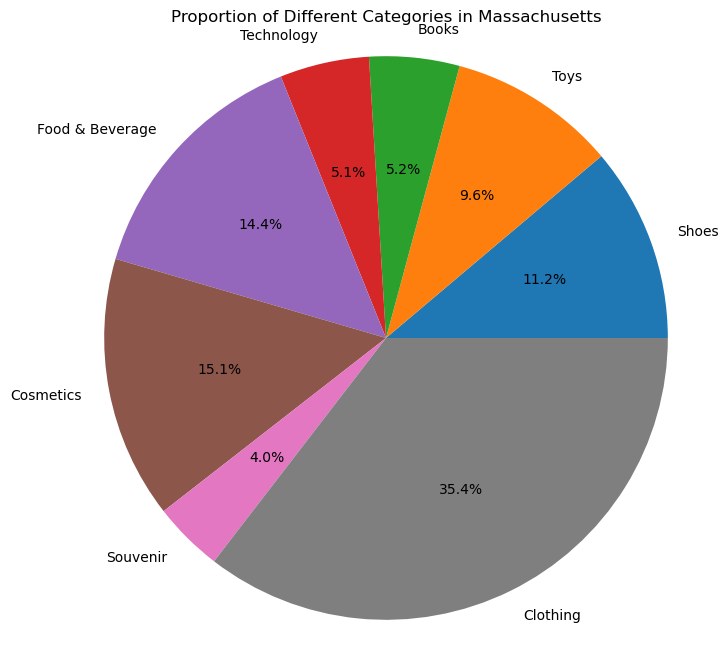

In [36]:
import matplotlib.pyplot as plt

match_stage = {'$match': {'state': 'Massachusetts'}}
group_stage = {'$group': {'_id': '$category', 'quantity': {'$sum': '$quantity'}}}
results = collection.aggregate([match_stage, group_stage])
    
category = []
quantity = []
for record in results:
    category.append(record['_id'])
    quantity.append(record['quantity'])
    
plt.figure(figsize=(8, 8))
plt.pie(quantity, labels=category, autopct='%1.1f%%')
plt.title('Proportion of Different Categories in Massachusetts')
plt.axis('equal')
plt.show

**Task 18**: Retrieve only the `invoice_no` and `selling_price_per_unit` fields for the `first 20` transactions.

In [48]:
project_stage = {'$project': {'invoice_no': 1, 'selling_price_per_unit': 1}}
limit_stage = {'$limit': 20}

results = collection.aggregate([project_stage, limit_stage])

for record in results:
    print(record)

{'_id': ObjectId('6554ec04d34996cab1c4daec'), 'invoice_no': 'I138884', 'selling_price_per_unit': 1500.4}
{'_id': ObjectId('6554ec04d34996cab1c4daed'), 'invoice_no': 'I317333', 'selling_price_per_unit': 1800.51}
{'_id': ObjectId('6554ec04d34996cab1c4daee'), 'invoice_no': 'I127801', 'selling_price_per_unit': 300.08}
{'_id': ObjectId('6554ec04d34996cab1c4daef'), 'invoice_no': 'I173702', 'selling_price_per_unit': 3000.85}
{'_id': ObjectId('6554ec04d34996cab1c4daf0'), 'invoice_no': 'I337046', 'selling_price_per_unit': 60.6}
{'_id': ObjectId('6554ec04d34996cab1c4daf1'), 'invoice_no': 'I227836', 'selling_price_per_unit': 1500.4}
{'_id': ObjectId('6554ec04d34996cab1c4daf2'), 'invoice_no': 'I121056', 'selling_price_per_unit': 40.66}
{'_id': ObjectId('6554ec04d34996cab1c4daf3'), 'invoice_no': 'I293112', 'selling_price_per_unit': 600.16}
{'_id': ObjectId('6554ec04d34996cab1c4daf4'), 'invoice_no': 'I293455', 'selling_price_per_unit': 900.24}
{'_id': ObjectId('6554ec04d34996cab1c4daf5'), 'invoice_n

**Task 19**: Identify the `highest` and `lowest` cash payment amounts recorded in a single transaction.

In [19]:
group_stage_with_max_min = {'$group': {'_id': {'payment_method': 'Cash'}, 'maxpayment': {'$max': {'$multiply': ['$quantity', '$selling_price_per_unit']}}, 'minpayment': {'$min': {'$multiply': ['$quantity', '$selling_price_per_unit']}}}}
results = collection.aggregate([group_stage_with_max_min])

for record in results:
    print(record)

{'_id': {'payment_method': 'Cash'}, 'maxpayment': 47250.0, 'minpayment': 5.23}


**Task 20**: Delete the first `10` transactions.

In [27]:
project_stage = {'$project': {'_id': 1}}
limit_stage = {'$limit': 10}

results = collection.aggregate([project_stage, limit_stage])

rec_del = [record['_id'] for record in results]

del_results = collection.delete_many({'_id': {'$in': rec_del}})

print(f"Deleted {del_results.deleted_count} records.")

for record in results:
    print(record)

Deleted 10 records.
